In [1]:
#QUESTION NO.1:- SIMPLE LINEAR REGRESSION(Predict delivery time using sorting time)
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
dtst=pd.read_csv('DT.csv')
dtst.shape 

(21, 2)

Text(0, 0.5, 'deliveryT')

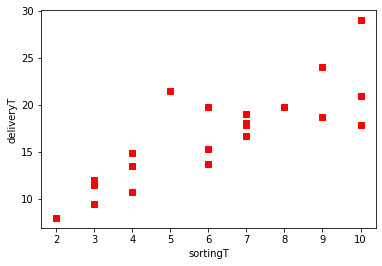

In [3]:
plt.plot(dtst.sortingT,dtst.deliveryT,'rs');
plt.xlabel("sortingT");
plt.ylabel("deliveryT")  

In [67]:
dtst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   deliveryT  21 non-null     float64
 1   sortingT   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [68]:
dtst.describe()

,deliveryT,sortingT
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [69]:
dtst.corr()

,deliveryT,sortingT
deliveryT,1.000000,0.825997
sortingT,0.825997,1.000000


In [4]:
#MODEL1
import statsmodels.formula.api as smf 

In [5]:
model1=smf.ols("deliveryT~sortingT",data=dtst).fit()
model1 

In [6]:
pred1=model1.predict(pd.DataFrame(dtst["sortingT"]))
pred1 

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [7]:
model1.resid 

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [8]:
#Cal. total or overall error for dataset by using metric called as [root means square error]
import numpy as np 
rmse1 = np.sqrt(np.mean((np.array(dtst['deliveryT'])-np.array(pred1))**2))
rmse1 

2.7916503270617654

In [9]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              deliveryT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 29 May 2022   Prob (F-statistic):           3.98e-06
Time:                        18:55:56   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sortingT       1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Apply those function when get (ERROR:-str is not collable)
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt) 

Text(0, 0.5, 'delivery time')

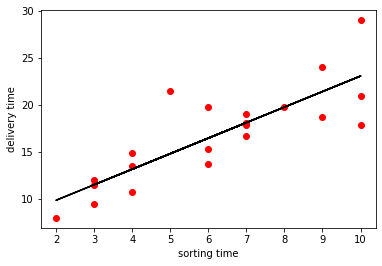

In [10]:
#Developed model1[got R-square=68.20% accuracy of model & rmse=2.79 is not okay for our right prediction that why again take trial for getting best straight line equation]
import matplotlib.pylab as plt
plt.scatter(x=dtst['sortingT'], y=dtst['deliveryT'], color ='red')  
plt.plot(dtst['sortingT'],pred1,color='black')
plt.xlabel('sorting time') 
plt.ylabel('delivery time')
 

In [10]:
#MODEL2
model2=smf.ols("deliveryT~np.log(sortingT)",data=dtst).fit()
model2

In [11]:
pred2=model2.predict(pd.DataFrame(dtst["sortingT"]))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [12]:
model2.resid 

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [13]:
#Cal. total or overall error for dataset by using metric called as [root means square error]
import numpy as np 
rmse2 = np.sqrt(np.mean((np.array(dtst['deliveryT'])-np.array(pred2))**2))
rmse2 

2.733171476682066

In [14]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              deliveryT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 09 May 2022   Prob (F-statistic):           2.64e-06
Time:                        18:40:03   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sortingT)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

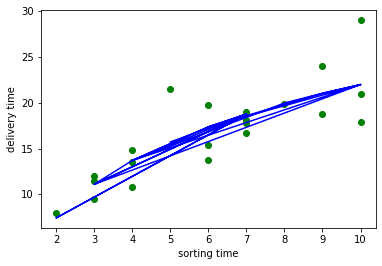

In [16]:
#Developed model2[got R-square=69.50% accuracy of model & rmse=2.73 is not okay for our right prediction that why again take trial for getting best straight line equation]
import matplotlib.pylab as plt
plt.scatter(x=dtst['sortingT'],y=dtst['deliveryT'],color='green')
plt.plot(dtst['sortingT'],pred2,color='blue')
plt.xlabel('sorting time')
plt.ylabel('delivery time')
plt.show () 

In [17]:
#MODEL3
model3=smf.ols("np.log(deliveryT)~sortingT",data=dtst).fit()
model3

In [18]:
pred3=model3.predict(pd.DataFrame(dtst['sortingT']))
pred3

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [19]:
pred3=np.exp(pred3)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [20]:
model3.resid

0    -0.132365
1     0.059111
2     0.228472
3     0.106718
4     0.190408
5    -0.023566
6     0.084206
7    -0.186735
8    -0.292087
9    -0.140142
10    0.021411
11   -0.168672
12   -0.046023
13    0.004320
14    0.049377
15    0.156440
16   -0.133643
17    0.036231
18   -0.253034
19    0.020649
20    0.418923
dtype: float64

In [21]:
import numpy as np 
rmse3 = np.sqrt(np.mean((np.array(dtst['deliveryT'])-np.array(pred3))**2))
rmse3 

2.940250323056201

In [22]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(deliveryT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 09 May 2022   Prob (F-statistic):           1.59e-06
Time:                        18:41:07   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
sortingT       0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

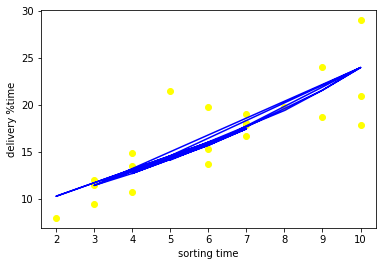

In [23]:
#Developed model3[got R-square=71.10% accuracy of model & rmse=2.94 is not okay for our right prediction that why again take trial for getting best straight line equation]
import matplotlib.pylab as plt
plt.scatter(x=dtst['sortingT'],y=dtst['deliveryT'],color='yellow')
plt.plot(dtst['sortingT'],pred3,color='blue')
plt.xlabel('sorting time')
plt.ylabel('delivery %time')
plt.show () 

In [24]:
dtst["sortingT_sq"]= dtst.sortingT*dtst.sortingT
dtst

,deliveryT,sortingT,sortingT_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [25]:
#MODEL4
model4=smf.ols("np.log(deliveryT)~sortingT+sortingT_sq",data=dtst).fit()
model4

In [26]:
pred4=model4.predict(pd.DataFrame(dtst))
pred4

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [27]:
pred4=np.exp(pred4)
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [28]:
model4.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

In [29]:
rmse4 = np.sqrt(np.mean((np.array(dtst['deliveryT'])-np.array(pred4))**2))
rmse4

2.7990419887409246

In [30]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(deliveryT)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Mon, 09 May 2022   Prob (F-statistic):           2.20e-06
Time:                        18:42:01   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6997      0.228      7.441      0.000       1.220       2.180
sortingT        0.2659      0.080      3.315      0.004       0.097       0.434
sortingT_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

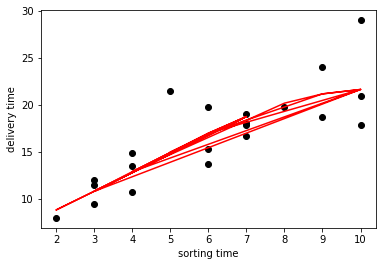

In [31]:
#Developed model4[got R-square=76.50% accuracy of model & rmse=2.79 got the atleast 76.50% accuracy of model after taking 3 trials]
plt.scatter(x=dtst['sortingT'],y=dtst['deliveryT'],color='black')
plt.plot(dtst['sortingT'],pred4,color='red')
plt.xlabel('sorting time')
plt.ylabel('delivery time')
plt.show () 

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <BarContainer object of 10 artists>)

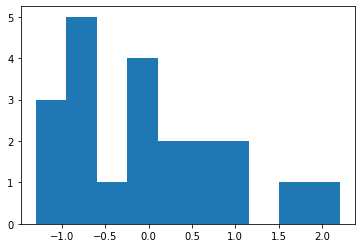

In [32]:
#Verifying the model whether it is valid or not by ploting histogram[standardize mean=0 @ centre & variance is constant:- Valid Model]
plt.hist(model4.resid_pearson)

Text(0, 0.5, 'Standardized Residual')

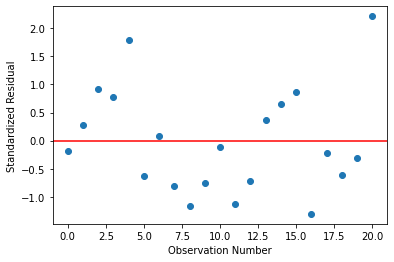

In [33]:
plt.scatter(np.arange(21),model4.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [ ]:
#QUESTION NO:-2 SIMPLE LINEAR REGREESION

In [34]:
salary_hike=pd.read_csv('Salary_Data.csv')
salary_hike 

,YWE,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [35]:
salary_hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YWE     30 non-null     float64
 1   Salary  30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [36]:
salary_hike.describe()

,YWE,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [47]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt) 

Text(0, 0.5, 'Salary')

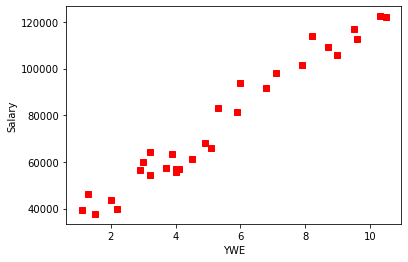

In [48]:
plt.plot(salary_hike.YWE,salary_hike.Salary,'rs');
plt.xlabel("YWE");
plt.ylabel("Salary")  

In [38]:
salary_hike.corr()

,YWE,Salary
YWE,1.000000,0.978242
Salary,0.978242,1.000000


In [39]:
model1=smf.ols("Salary~YWE",data=salary_hike).fit()
model1 

In [40]:
pred1=model1.predict(pd.DataFrame(salary_hike['YWE']))
pred1 

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [41]:
model1.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [42]:
rmse1 = np.sqrt(np.mean((np.array(salary_hike['Salary'])-np.array(pred1))**2))
rmse1

5592.043608760662

In [43]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 09 May 2022   Prob (F-statistic):           1.14e-20
Time:                        18:43:47   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YWE         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

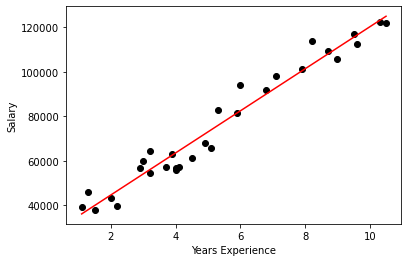

In [49]:
#Developed model1[got R-square=95.70% accuracy of model & rmse=5592.0436 got the high accuracy of model so our first trial is a best straight line equation for prediction]
plt.scatter(x=salary_hike['YWE'],y=salary_hike['Salary'],color='black')
plt.plot(salary_hike['YWE'],pred1,color='red')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show ()

(array([6., 2., 4., 3., 6., 2., 1., 2., 2., 2.]),
 array([-1.37484017, -1.03957794, -0.70431572, -0.36905349, -0.03379126,
         0.30147096,  0.63673319,  0.97199542,  1.30725764,  1.64251987,
         1.9777821 ]),
 <BarContainer object of 10 artists>)

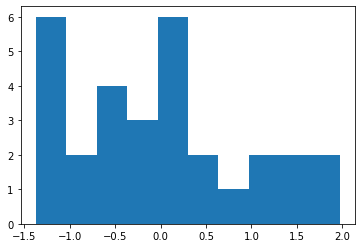

In [50]:
#Verifying the model whether it is valid or not by ploting histogram[standardize mean=0 @ centre & variance is constant:- Valid Model]
plt.hist(model1.resid_pearson)

Text(0, 0.5, 'Standardized Residual')

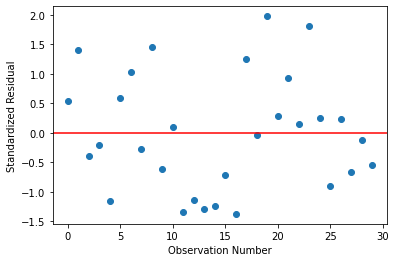

In [51]:
plt.scatter(np.arange(30),model1.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")